In [1]:
import requests 
import json 
import pandas as pd 
import numpy as np  
import datetime as dt  
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
frequency = input("Please enter the frequency (1m/5m/30m/.../1h/6h/1d/ :  ")

def get_bars(symbol, interval=frequency):
    root_url = 'https://api.binance.com/api/v1/klines'
    url = root_url + '?symbol=' + symbol + '&interval=' + interval
    data = json.loads(requests.get(url).text)
    df = pd.DataFrame(data)
    df.columns = ['open_time',
                  'o', 'h', 'l', 'c', 'v',
                  'close_time', 'qav', 'num_trades',
                  'taker_base_vol', 'taker_quote_vol', 'ignore']
    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.close_time]
    return df

btcusdt = get_bars('BTCUSDT')
ethusdt = get_bars('ETHUSDT')
bnbusdt= get_bars('BNBUSDT')
adausdt = get_bars('ADAUSDT')
solusdt = get_bars('SOLUSDT')

Please enter the frequency (1m/5m/30m/.../1h/6h/1d/ :  1d


In [3]:
d_1=[]
for date in btcusdt.index:
    d=datetime.date(date)
    d_1.append(d)
d_2=[]
for date in ethusdt.index:
    d=datetime.date(date)
    d_2.append(d)
d_3=[]
for date in bnbusdt.index:
    d=datetime.date(date)
    d_3.append(d)
d_4=[]
for date in adausdt.index:
    d=datetime.date(date)
    d_4.append(d)
d_5=[]
for date in solusdt.index:
    d=datetime.date(date)
    d_5.append(d)

In [4]:
bnbusdt["date"]=d_1
bnbusdt.set_index("date")
train_data_h_1 = bnbusdt["h"].iloc[:].astype("float32")
train_data_l_1= bnbusdt["l"].iloc[:].astype("float32")

In [5]:
ethusdt["date"]=d_2
ethusdt.set_index("date")
train_data_h_2 = ethusdt["h"].iloc[:].astype("float32")
train_data_l_2= ethusdt["l"].iloc[:].astype("float32")

In [6]:
solusdt["date"]=d_5
solusdt.set_index("date")
train_data_h_3 = solusdt["h"].iloc[:].astype("float32")
train_data_l_3= solusdt["l"].iloc[:].astype("float32")

In [7]:
btcusdt["date"]=d_3
btcusdt.set_index("date")
train_data_h_4 = btcusdt["h"].iloc[:].astype("float32")
train_data_l_4= btcusdt["l"].iloc[:].astype("float32")

In [8]:
adausdt["date"]=d_4
adausdt.set_index("date")
train_data_h_5=adausdt["h"].iloc[:].astype("float32")
train_data_l_5= adausdt["l"].iloc[:].astype("float32")

# Probablity and Partical Correlation Plot

BNB
P-value for high:  0.7226454368782608
P-value for low:  0.7766815885364831


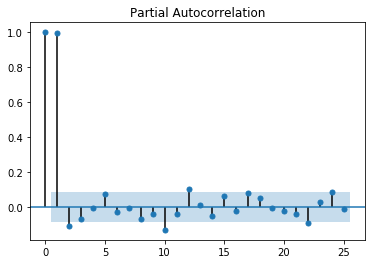

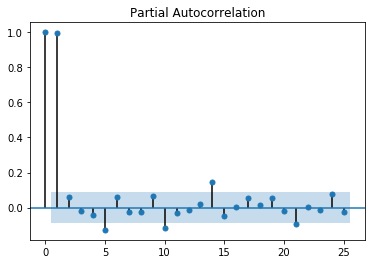

In [9]:
print("BNB")
df_stationarityTest_h = adfuller(bnbusdt["h"].astype("float32"), autolag='AIC')
df_stationarityTest_l= adfuller(bnbusdt["l"].astype("float32"), autolag='AIC')
print("P-value for high: ", df_stationarityTest_h[1])
print("P-value for low: ", df_stationarityTest_l[1])
pacf = plot_pacf(bnbusdt["h"], lags=25)
pacf = plot_pacf(bnbusdt["l"], lags=25)

ETH
P-value for high:  0.9453052840969027
P-value for low:  0.9449717503291432


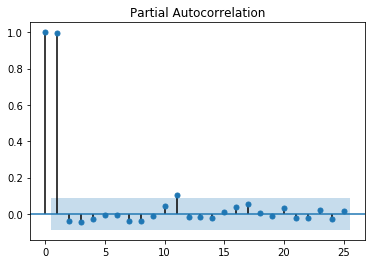

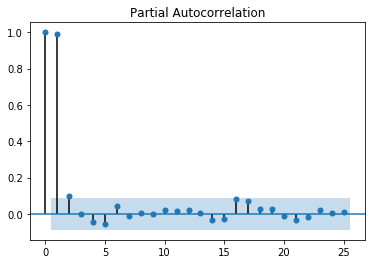

In [10]:
print("ETH")
df_stationarityTest_h = adfuller(ethusdt["h"].astype("float32"), autolag='AIC')
df_stationarityTest_l= adfuller(ethusdt["l"].astype("float32"), autolag='AIC')
print("P-value for high: ", df_stationarityTest_h[1])
print("P-value for low: ", df_stationarityTest_l[1])
pacf = plot_pacf(ethusdt["h"], lags=25)
pacf = plot_pacf(ethusdt["l"], lags=25)

Sol
P-value for high:  0.9962098177028296
P-value for low:  0.998758297519044


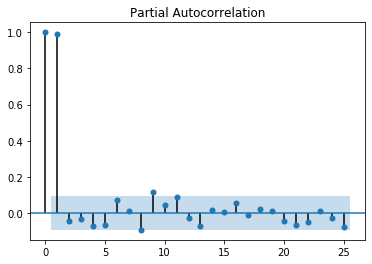

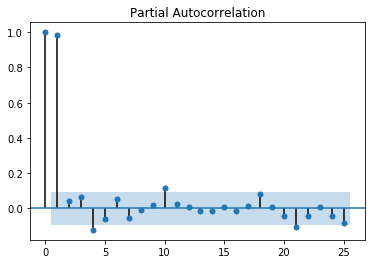

In [11]:
print("Sol")
df_stationarityTest_h = adfuller(solusdt["h"].astype("float32"), autolag='AIC')
df_stationarityTest_l= adfuller(solusdt["l"].astype("float32"), autolag='AIC')
print("P-value for high: ", df_stationarityTest_h[1])
print("P-value for low: ", df_stationarityTest_l[1])
pacf = plot_pacf(solusdt["h"], lags=25)
pacf = plot_pacf(solusdt["l"], lags=25)

ADA
P-value for high:  0.7162766203641826
P-value for low:  0.8810977481534017


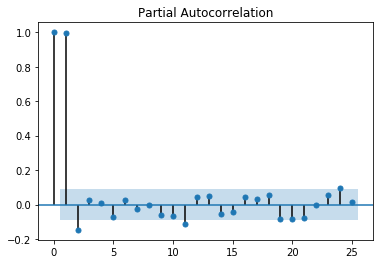

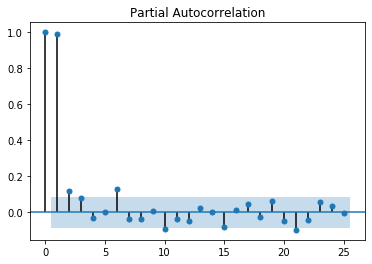

In [12]:
print("ADA")
df_stationarityTest_h = adfuller(adausdt["h"].astype("float32"), autolag='AIC')
df_stationarityTest_l= adfuller(adausdt["l"].astype("float32"), autolag='AIC')
print("P-value for high: ", df_stationarityTest_h[1])
print("P-value for low: ", df_stationarityTest_l[1])
pacf = plot_pacf(adausdt["h"], lags=25)
pacf = plot_pacf(adausdt["l"], lags=25)

BTC
P-value for high:  0.7878045401475804
P-value for low:  0.8122483296467151


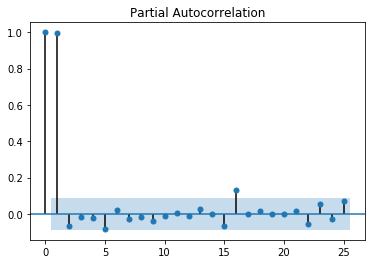

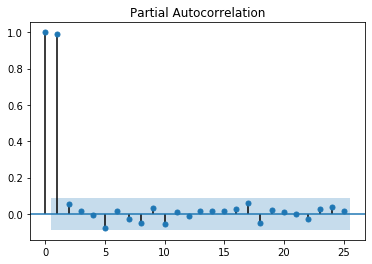

In [13]:
print("BTC")
df_stationarityTest_h = adfuller(btcusdt["h"].astype("float32"), autolag='AIC')
df_stationarityTest_l= adfuller(btcusdt["l"].astype("float32"), autolag='AIC')
print("P-value for high: ", df_stationarityTest_h[1])
print("P-value for low: ", df_stationarityTest_l[1])
pacf = plot_pacf(btcusdt["h"], lags=25)
pacf = plot_pacf(btcusdt["l"], lags=25)

# AutoRegression and plot of High and Low Prices of Crypto

BNB
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(8)   Log Likelihood               -2076.485
Method:               Conditional MLE   S.D. of innovations             16.470
Date:                Fri, 29 Oct 2021   AIC                              5.644
Time:                        17:44:24   BIC                              5.729
Sample:                             8   HQIC                             5.677
                                  500                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5760      1.109      1.421      0.155      -0.598       3.750
y.L1           1.1331      0.045     25.157      0.000       1.045       1.221
y.L2          -0.0346      0.068     -0.508     

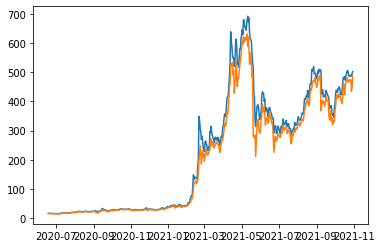

In [14]:
print("BNB")
ar_h_model = AutoReg(np.asarray(train_data_h_1), lags=8).fit()
ar_l_model = AutoReg(np.asarray(train_data_l_1), lags=8).fit()
print(ar_h_model.summary())
print(ar_l_model.summary())
plt.plot(train_data_h_1)
plt.plot(train_data_l_1)

ETH
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(8)   Log Likelihood               -2900.828
Method:               Conditional MLE   S.D. of innovations             87.975
Date:                Fri, 29 Oct 2021   AIC                              8.995
Time:                        17:44:24   BIC                              9.080
Sample:                             8   HQIC                             9.028
                                  500                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.4437      6.809      1.240      0.215      -4.903      21.790
y.L1           1.1330      0.045     25.137      0.000       1.045       1.221
y.L2          -0.0856      0.068     -1.255     

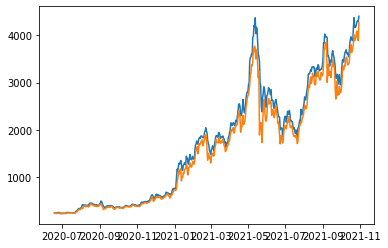

In [15]:
print("ETH")
ar_h_model = AutoReg(np.asarray(train_data_h_2), lags=8).fit()
ar_l_model = AutoReg(np.asarray(train_data_l_2), lags=8).fit()
print(ar_h_model.summary())
print(ar_l_model.summary())
plt.plot(train_data_h_2)
plt.plot(train_data_l_2)

SOL
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  445
Model:                     AutoReg(8)   Log Likelihood               -1245.494
Method:               Conditional MLE   S.D. of innovations              4.184
Date:                Fri, 29 Oct 2021   AIC                              2.908
Time:                        17:44:24   BIC                              3.001
Sample:                             8   HQIC                             2.945
                                  445                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2214      0.248      0.892      0.372      -0.265       0.708
y.L1           1.2146      0.047     25.646      0.000       1.122       1.307
y.L2          -0.2463      0.074     -3.331     

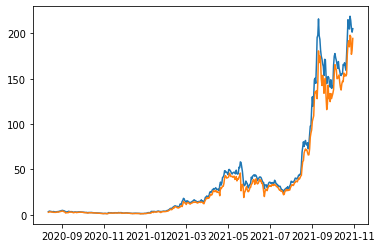

In [16]:
print("SOL")
ar_h_model = AutoReg(np.asarray(train_data_h_3), lags=8).fit()
ar_l_model = AutoReg(np.asarray(train_data_l_3), lags=8).fit()
print(ar_h_model.summary())
print(ar_l_model.summary())
plt.plot(train_data_h_3)
plt.plot(train_data_l_3)

BTC
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(8)   Log Likelihood               -4231.608
Method:               Conditional MLE   S.D. of innovations           1315.394
Date:                Fri, 29 Oct 2021   AIC                             14.404
Time:                        17:44:25   BIC                             14.490
Sample:                             8   HQIC                            14.438
                                  500                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    184.2938    126.614      1.456      0.146     -63.866     432.453
y.L1           1.0837      0.045     24.053      0.000       0.995       1.172
y.L2          -0.0424      0.067     -0.637     

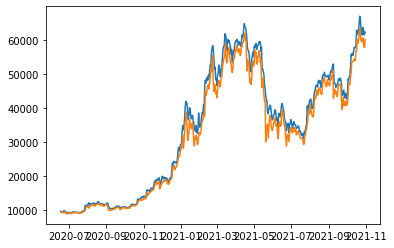

In [17]:
print("BTC")
ar_h_model = AutoReg(np.asarray(train_data_h_4), lags=8).fit()
ar_l_model = AutoReg(np.asarray(train_data_l_4), lags=8).fit()
print(ar_h_model.summary())
print(ar_l_model.summary())
plt.plot(train_data_h_4)
plt.plot(train_data_l_4)

ADA
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(8)   Log Likelihood                 655.676
Method:               Conditional MLE   S.D. of innovations              0.064
Date:                Fri, 29 Oct 2021   AIC                             -5.463
Time:                        17:44:25   BIC                             -5.377
Sample:                             8   HQIC                            -5.429
                                  500                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0062      0.004      1.417      0.156      -0.002       0.015
y.L1           1.1845      0.045     26.277      0.000       1.096       1.273
y.L2          -0.2718      0.070     -3.888     

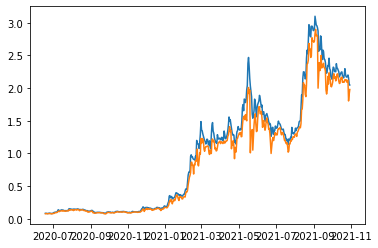

In [18]:
print("ADA")
ar_h_model = AutoReg(np.asarray(train_data_h_5), lags=8).fit()
ar_l_model = AutoReg(np.asarray(train_data_l_5), lags=8).fit()
print(ar_h_model.summary())
print(ar_l_model.summary())
plt.plot(train_data_h_5)
plt.plot(train_data_l_5)

# Augmented Dickey-Fuller test

#### ADF Function

In [19]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [20]:
print("BNB")
print("-----------------------------------------------------------")
adf_test(train_data_h_1)
adf_test(train_data_l_1)

BNB
-----------------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -1.080856
p-value                          0.722645
#Lags Used                      11.000000
Number of Observations Used    488.000000
Critical Value (1%)             -3.443821
Critical Value (5%)             -2.867481
Critical Value (10%)            -2.569934
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -0.933672
p-value                          0.776682
#Lags Used                      13.000000
Number of Observations Used    486.000000
Critical Value (1%)             -3.443877
Critical Value (5%)             -2.867505
Critical Value (10%)            -2.569947
dtype: float64


In [21]:
print("ETH")
print("-----------------------------------------------------------")
adf_test(train_data_h_2)
adf_test(train_data_l_2)

ETH
-----------------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -0.140004
p-value                          0.945305
#Lags Used                      10.000000
Number of Observations Used    489.000000
Critical Value (1%)             -3.443794
Critical Value (5%)             -2.867469
Critical Value (10%)            -2.569928
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -0.143110
p-value                          0.944972
#Lags Used                       1.000000
Number of Observations Used    498.000000
Critical Value (1%)             -3.443549
Critical Value (5%)             -2.867361
Critical Value (10%)            -2.569870
dtype: float64


In [22]:
print("SOL")
print("-----------------------------------------------------------")
adf_test(train_data_h_3)
adf_test(train_data_l_3)

SOL
-----------------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                   1.233571
p-value                          0.996210
#Lags Used                      18.000000
Number of Observations Used    426.000000
Critical Value (1%)             -3.445794
Critical Value (5%)             -2.868349
Critical Value (10%)            -2.570397
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   2.070911
p-value                          0.998758
#Lags Used                      17.000000
Number of Observations Used    427.000000
Critical Value (1%)             -3.445758
Critical Value (5%)             -2.868333
Critical Value (10%)            -2.570388
dtype: float64


In [23]:
print("BTC")
print("-----------------------------------------------------------")
adf_test(train_data_h_4)
adf_test(train_data_l_4)

BTC
-----------------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -0.900510
p-value                          0.787805
#Lags Used                       4.000000
Number of Observations Used    495.000000
Critical Value (1%)             -3.443630
Critical Value (5%)             -2.867397
Critical Value (10%)            -2.569889
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -0.823080
p-value                          0.812248
#Lags Used                       0.000000
Number of Observations Used    499.000000
Critical Value (1%)             -3.443523
Critical Value (5%)             -2.867350
Critical Value (10%)            -2.569864
dtype: float64


In [24]:
print("ADA")
print("-----------------------------------------------------------")
adf_test(train_data_h_5)
adf_test(train_data_l_5)

ADA
-----------------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -1.096975
p-value                          0.716277
#Lags Used                      11.000000
Number of Observations Used    488.000000
Critical Value (1%)             -3.443821
Critical Value (5%)             -2.867481
Critical Value (10%)            -2.569934
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -0.553732
p-value                          0.881098
#Lags Used                       5.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64


# Arima Test Accuracy For each Crypto

In [25]:
print("BNB")
print("----------------------------------------------------")
print("accruarcy of high")
history = [x for x in train_data_h_1.iloc[:-5]]
test_data=train_data_h_1.iloc[-5:]
predictions = list()
# walk-forward validation
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)
print("accruarcy of low")
history = [x for x in train_data_l_1.iloc[:-5]]
test_data=train_data_l_1.iloc[-5:]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,2,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

BNB
----------------------------------------------------
accruarcy of high
predicted=486.630131, expected=488.600006
predicted=490.525355, expected=489.799988
predicted=491.963982, expected=486.399994
predicted=486.205518, expected=494.799988
predicted=496.200329, expected=502.000000
Test RMSE: 5.345
accruarcy of low
predicted=465.713966, expected=474.700012
predicted=482.372559, expected=473.500000
predicted=474.282588, expected=435.299988
predicted=427.501911, expected=446.399994
predicted=457.344015, expected=487.600006
Test RMSE: 24.297


In [26]:
print("ETH")
print("----------------------------------------------------")
print("accruarcy of high")
history = [x for x in train_data_h_2.iloc[:-5]]
test_data=train_data_h_2.iloc[-5:]
predictions = list()
# walk-forward validation
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,2,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)
print("accruarcy of low")
history = [x for x in train_data_l_2.iloc[:-5]]
test_data=train_data_l_2.iloc[-5:]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history, order=(6,3,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

ETH
----------------------------------------------------
accruarcy of high
predicted=4188.054968, expected=4236.000000
predicted=4254.324398, expected=4297.000000
predicted=4308.563353, expected=4307.000000
predicted=4325.221677, expected=4295.000000
predicted=4301.054819, expected=4405.500000
Test RMSE: 56.470
accruarcy of low
predicted=3980.386098, expected=4067.709961
predicted=4055.050105, expected=4090.209961
predicted=4118.170062, expected=3909.000000
predicted=3938.344607, expected=3890.169922
predicted=3906.566067, expected=4265.970215
Test RMSE: 191.888


In [27]:
print("SOL")
print("----------------------------------------------------")
print("accruarcy of high")
history = [x for x in train_data_h_3.iloc[:-5]]
test_data=train_data_h_3.iloc[-5:]
predictions = list()
# walk-forward validation
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)
print("accruarcy of low")
history = [x for x in train_data_l_3.iloc[:-5]]
test_data=train_data_l_3.iloc[-5:]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

SOL
----------------------------------------------------
accruarcy of high
predicted=206.552501, expected=218.929993
predicted=224.627723, expected=214.199997
predicted=211.942439, expected=205.490005
predicted=205.845363, expected=201.380005
predicted=202.937105, expected=205.220001
Test RMSE: 8.108
accruarcy of low
predicted=187.077562, expected=198.000000
predicted=201.102069, expected=196.360001
predicted=195.603935, expected=176.940002
predicted=176.897629, expected=181.639999
predicted=187.582833, expected=194.449997
Test RMSE: 10.581


In [28]:
print("BTC")
print("----------------------------------------------------")
print("accruarcy of high")
history = [x for x in train_data_h_4.iloc[:-5]]
test_data=train_data_h_4.iloc[-5:]
predictions = list()
# walk-forward validation
for t in range(len(test_data)):
    model = ARIMA(history, order=(10,4,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)
print("accruarcy of low")
history = [x for x in train_data_l_4.iloc[:-5]]
test_data=train_data_l_4.iloc[-5:]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history, order=(10,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

BTC
----------------------------------------------------
accruarcy of high
predicted=62264.852360, expected=63710.628906
predicted=64056.499777, expected=63293.480469
predicted=62808.896413, expected=61496.000000
predicted=60995.054301, expected=62499.000000
predicted=63223.919174, expected=62100.000000
Test RMSE: 1258.667
accruarcy of low
predicted=59863.222759, expected=60650.000000
predicted=60654.372268, expected=59817.550781
predicted=59864.962552, expected=58000.000000
predicted=57802.670701, expected=57820.000000
predicted=58276.940585, expected=60174.808594
Test RMSE: 1296.116


In [29]:
print("ADA")
print("----------------------------------------------------")
print("accruarcy of high")
history = [x for x in train_data_h_5.iloc[:-5]]
test_data=train_data_h_5.iloc[-5:]
predictions = list()
# walk-forward validation
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)
print("accruarcy of low")
history = [x for x in train_data_l_5.iloc[:-5]]
test_data=train_data_l_5.iloc[-5:]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history, order=(5,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

ADA
----------------------------------------------------
accruarcy of high
predicted=2.185643, expected=2.178000
predicted=2.171305, expected=2.202000
predicted=2.211027, expected=2.156000
predicted=2.150181, expected=2.058000
predicted=2.046819, expected=2.048000
Test RMSE: 0.050
accruarcy of low
predicted=2.102552, expected=2.114000
predicted=2.113767, expected=2.122000
predicted=2.128805, expected=1.804000
predicted=1.851007, expected=1.905000
predicted=1.926178, expected=1.979000
Test RMSE: 0.149


# Future Prediction

In [30]:
print("BNB")
print("---------------------------------------------")
history = [x for x in train_data_h_1]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(5,2,1))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_h_1 = output
print("high_prediction")
print(yhat_h_1)
history = [x for x in train_data_l_1]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(5,2,3))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_l_1 = output
print("low_prediction")
print(yhat_l_1)

BNB
---------------------------------------------
high_prediction
[504.64507531 506.91190131 507.23477341 507.9097058 ]
low_prediction
[483.03673314 481.26367727 489.30128311 488.19469979]


In [31]:
print("ETH")
print("---------------------------------------------")
history = [x for x in train_data_h_2]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(10,4,2))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_h_2 = output
print("high_prediction")
print(yhat_h_2)
history = [x for x in train_data_l_2]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(6,3,3))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_l_2 = output
print("low_prediction")
print(yhat_l_2)

ETH
---------------------------------------------
high_prediction
[4474.47751522 4479.47104476 4552.17896845 4634.99167878]
low_prediction
[4308.69786043 4319.95765647 4406.08132972 4511.22440219]


In [32]:
print("SOL")
print("---------------------------------------------")
history = [x for x in train_data_h_3]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(5,2,1))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_h_3 = output
print("high_prediction")
print(yhat_h_3)
history = [x for x in train_data_l_3]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(5,2,1))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_l_3 = output
print("low_prediction")
print(yhat_l_3)

SOL
---------------------------------------------
high_prediction
[205.35517344 205.06722979 205.87561345 207.41084163]
low_prediction
[193.58617906 191.49579288 195.55852001 198.11147413]


In [33]:
print("BTC")
print("---------------------------------------------")
history = [x for x in train_data_h_4]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(10,4,2))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_h_4 = output
print("high_prediction")
print(yhat_h_4)
history = [x for x in train_data_l_4]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(10,2,1))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_l_4 = output
print("low_prediction")
print(yhat_l_4)

BTC
---------------------------------------------
high_prediction
[62644.61437552 62487.78609096 62032.32109951 61264.2525689 ]
low_prediction
[60369.9445797  60226.00075934 60258.81613409 60383.26840963]


In [34]:
print("ADA")
print("---------------------------------------------")
history = [x for x in train_data_h_5]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(5,2,1))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_h_5 = output
print("high_prediction")
print(yhat_h_5)
history = [x for x in train_data_l_5]
predictions = list()
# walk-forward validation
model = ARIMA(history, order=(5,2,1))
model_fit = model.fit()
output = model_fit.forecast(4)
yhat_l_5 = output
print("low_prediction")
print(yhat_l_5)

ADA
---------------------------------------------
high_prediction
[2.06149737 2.06649061 2.06244569 2.06830927]
low_prediction
[1.98297252 1.98833374 2.03487589 2.01398478]


In [35]:
option=int(input("What do you want to do 1.Buy Or 2.Sell :"))
if option==1:
    crypto=int(input("Which Crypto 1.BNB 2.BTC 3.ADA 4.SOL 5.ETH :"))
    if crypto==1:
        print("This is the lowest prize that you should buy your crypto at ",min(yhat_h_1),"in the next 4 days")
    elif crypto==2:
        print("This is the lowest prize that you should buy your crypto at ",min(yhat_h_3),"in the next 4 days")
    elif crypto==3:
        print("This is the lowest prize that you should buy your crypto at ",min(yhat_h_4),"in the next 4 days")
    elif crypto==4:
        print("This is the lowest prize that you should buy your crypto at ",min(yhat_h_5),"in the next 4 days")
    elif crypto==5:
        print("This is the lowest prize that you should buy your crypto at ",min(yhat_h_2),"in the next 4 days")
else:
    crypto=int(input("Which Crypto 1.BNB 2.BTC 3.ADA 4.SOL 5.ETH :"))
    if crypto==1:
        print("This is the highest prize that you should sell your crypto at ",max(yhat_h_1),"in the next 4 days")
    elif crypto==2:
        print("This is the highest prize that you should sell your crypto at ",max(yhat_h_3),"in the next 4 days")
    elif crypto==3:
        print("This is the highest prize that you should sell your crypto at ",max(yhat_h_4),"in the next 4 days")
    elif crypto==4:
        print("This is the highest prize that you should sell your crypto at ",max(yhat_h_5),"in the next 4 days")
    elif crypto==5:
        print("This is the highest prize that you should sell your crypto at ",max(yhat_h_2),"in the next 4 days")

What do you want to do 1.Buy Or 2.Sell :1
Which Crypto 1.BNB 2.BTC 3.ADA 4.SOL 5.ETH :1
This is the lowest prize that you should buy your crypto at  504.6450753095979 in the next 4 days
